Random Forest Classification excercise. </t>
Given the classification problem: that is to classify the ratings of bonds; Random Forest is a great starting point.
The Dependent Variable (target variable) is  "Rating_Score_Rating", which is an ordinal variable.

In [25]:
import pandas as pd
import import_ipynb
from Process_Data import clean_data
from Process_Data import des_columns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

1) Load the data.
2) Process descriptive (nominal, categorical variables) as dummies.
3) Remove columns such as: Name based which would lead to overfit of the model. For example, there is a specific name for each bond then overfitting would be very likely if the forest is very deep.
4) Assign "Y" variable and "Xs"

In [28]:
data=clean_data

In [30]:
data = pd.get_dummies(data, columns=des_columns.index, drop_first=True)

In [32]:
X=data.loc[:,~data.columns.str.contains('Rating|Issuer|Ticker')]

In [34]:
Y=data['Rating_Score_Rating']

Split the data-set into Train and Test.
Stratification is very important due to the skewed rating distribution profile of the "Y/Rating" variable

In [37]:
# Train-test split (80/20), stratified to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)

Cross Validation with 5-folds in order to avoid over-fitting, yet maintain the right distribution of Y variable.

In [40]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Hyperparameter Tuning of the Random Forest Classification Model

In [43]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [ 15,25,35],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='f1_macro',  
    n_jobs=-1,
    verbose=1
)

# Run the search
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

print("Best Parameters:\n", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Luca\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters:
 {'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [44]:
# Predict on test set
y_pred = best_rf.predict(X_test)

# Evaluation metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       1.00      0.73      0.84        11
           2       0.50      0.33      0.40        21
           3       0.76      0.31      0.44        62
           4       0.65      0.49      0.56       116
           5       0.64      0.69      0.66       217
           6       0.61      0.62      0.62       247
           7       0.58      0.41      0.48       274
           8       0.56      0.79      0.66       344
           9       0.70      0.67      0.68       178
          10       0.00      0.00      0.00         1

    accuracy                           0.61      1484
   macro avg       0.61      0.51      0.55      1484
weighted avg       0.62      0.61      0.60      1484

Confusion Matrix:

[[  8   0   1   0   2   2   0   0   0   0   0]
 [  1   8   0   1   0   1   0   0   0   0   0]
 [  0   0   7   3   5   3   2   1   0   0   0]
 [

C:\Users\Luca\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Luca\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Luca\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


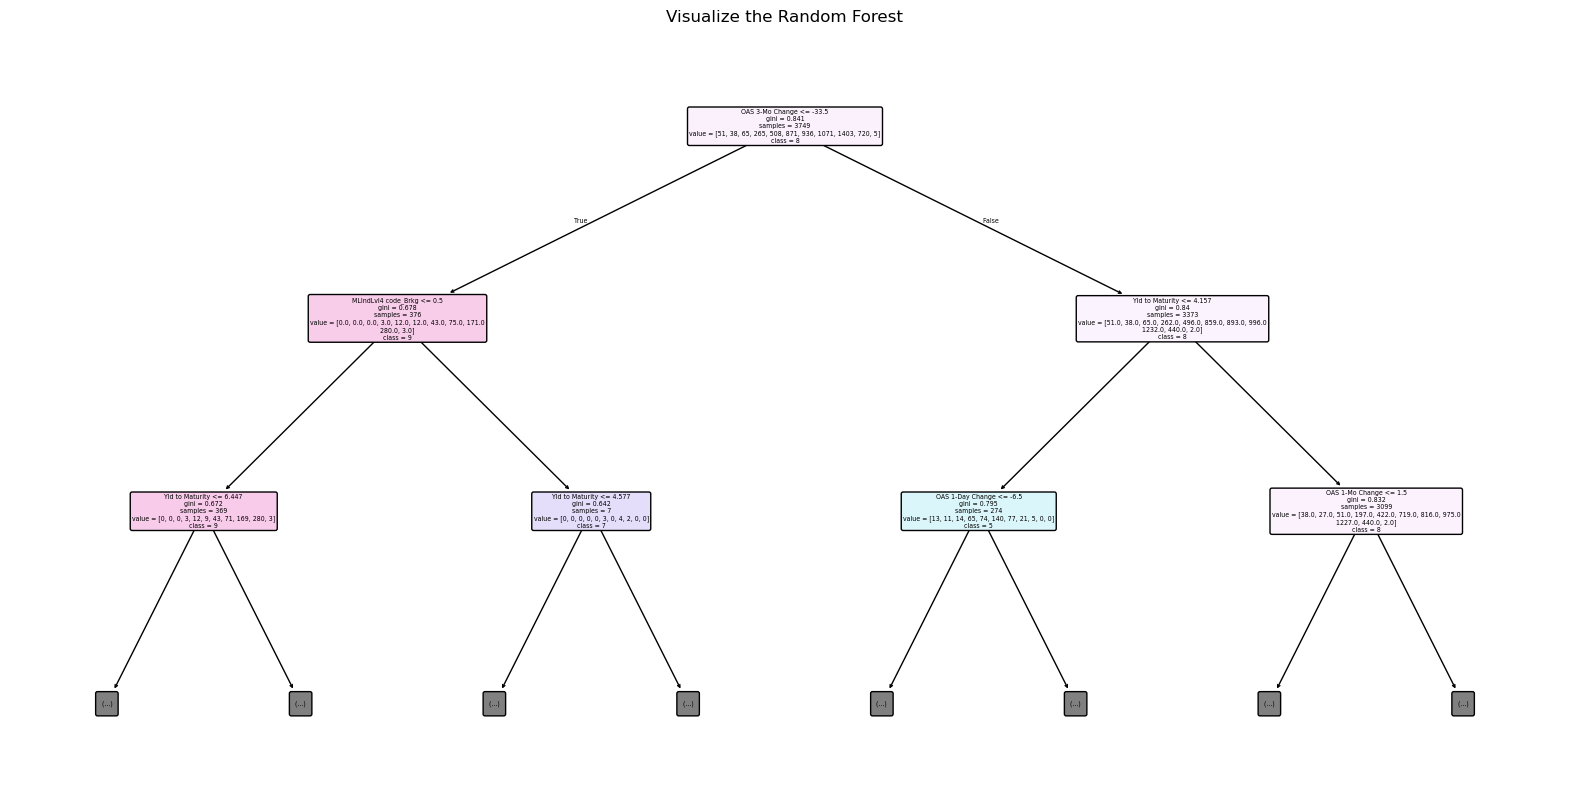

In [45]:
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0], 
          feature_names=X.columns, 
          class_names=best_rf.classes_.astype(str), 
          filled=True, 
          max_depth=2,  # limit depth to keep it readable
          rounded=True)
plt.title("Visualize the Random Forest")
plt.show()

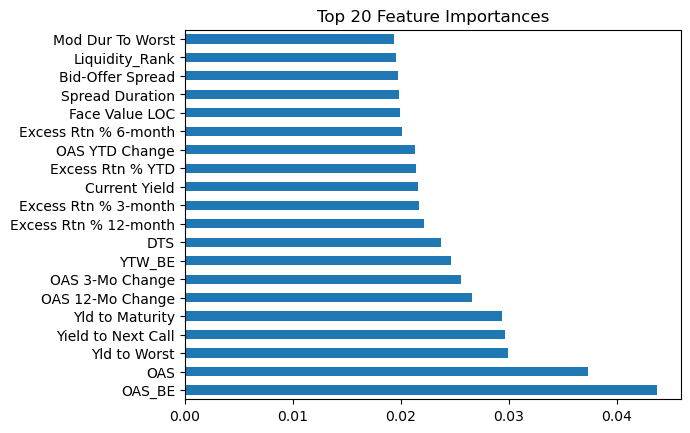

In [46]:
nr_features=20
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
importances.nlargest(nr_features).plot(kind='barh')
plt.title(f"Top {nr_features} Feature Importances")
plt.show()

In [24]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X,Y, cv=5, scoring='accuracy')
print("CV accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

C:\Users\Luca\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


CV accuracy scores: [0.54499579 0.53406224 0.47350715 0.46005046 0.52609428]
Mean CV accuracy: 0.5077419838984178
